**Customer Segmentation for Financial services using Machine Learning**

**Business Problem**

Financial institutions serve millions of customers with different income levels,risk profiles,spending behaviors and product needs. Hence,treating all customers the same leads to poor marketing ROI,low cross-sell success and high churn.

**Goal**

Segment customers into meaningful groups so the bank can personalize offers,
reduce churn,improve profitability

**Synthetic Dataset Generator**

In [1]:
import numpy as np
import pandas as pd

np.random.seed(42)

n = 1500

data = pd.DataFrame({
    "Age": np.random.randint(21, 65, n),
    "Income": np.random.normal(60000, 20000, n).clip(15000, 150000),
    "CreditScore": np.random.normal(680, 60, n).clip(300, 850),
    "AccountTenure": np.random.randint(1, 20, n),
    "MonthlySpending": np.random.normal(2500, 1200, n).clip(200, 15000),
    "TransactionFrequency": np.random.randint(5, 120, n),
    "AvgAccountBalance": np.random.normal(20000, 15000, n).clip(500, 200000),
    "NumProducts": np.random.randint(1, 8, n),
    "AppUsageScore": np.random.uniform(1, 10, n),
    "SupportCalls": np.random.randint(0, 12, n)
})

data.to_csv("finance_customers.csv", index=False)
data.head()


,Age,Income,CreditScore,AccountTenure,MonthlySpending,TransactionFrequency,AvgAccountBalance,NumProducts,AppUsageScore,SupportCalls
0,59,58619.549700,720.288836,14,1641.039085,70,21084.236453,5,4.086029,6
1,49,56248.426715,719.685367,17,2207.032100,67,24954.695819,4,4.765320,11
2,35,62503.093941,705.468386,18,2028.715165,91,12102.721865,5,9.360521,6
3,63,64592.903539,669.914392,3,2218.755852,45,24764.179422,4,9.196766,4
4,28,40687.648002,704.294846,2,2474.288136,90,21801.737192,2,7.441088,9


A synthetic dataset generated with three features namely:

**Customer Profile** consisting Age, Gender, Income, Employment status,credit score and account tenure.

**Behavioral** consisting monthly spending, transaction frequency, avg account balance, Loan amount and Number of products used.

**Engagement** consisting App usage, Complains count and Support calls


In [2]:
# EDA + Feature Engineering + Clustering
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score


In [3]:
# Load & Inspect
df = pd.read_csv("finance_customers.csv")
df.info()
df.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Age                   1500 non-null   int64  
 1   Income                1500 non-null   float64
 2   CreditScore           1500 non-null   float64
 3   AccountTenure         1500 non-null   int64  
 4   MonthlySpending       1500 non-null   float64
 5   TransactionFrequency  1500 non-null   int64  
 6   AvgAccountBalance     1500 non-null   float64
 7   NumProducts           1500 non-null   int64  
 8   AppUsageScore         1500 non-null   float64
 9   SupportCalls          1500 non-null   int64  
dtypes: float64(5), int64(5)
memory usage: 117.3 KB


,Age,Income,CreditScore,AccountTenure,MonthlySpending,TransactionFrequency,AvgAccountBalance,NumProducts,AppUsageScore,SupportCalls
count,1500.000000,1500.000000,1500.000000,1500.00000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000
mean,42.713333,60940.983634,680.000240,9.98000,2547.632125,61.746667,20555.113415,4.100667,5.475063,5.425333
std,12.628862,19652.262653,60.015813,5.50198,1183.199282,32.895206,13719.878012,2.007291,2.645933,3.490637
min,21.000000,15000.000000,479.629989,1.00000,200.000000,5.000000,500.000000,1.000000,1.001420,0.000000
25%,32.000000,47673.666429,637.626050,5.00000,1710.901020,33.000000,9674.083206,2.000000,3.142919,2.000000
50%,43.500000,60859.328914,680.629588,10.00000,2549.479762,62.000000,20245.753416,4.000000,5.401549,5.000000
75%,54.000000,74560.364488,723.193751,15.00000,3371.125819,91.000000,30031.784506,6.000000,7.812991,9.000000
max,64.000000,129917.555792,850.000000,19.00000,5912.736876,119.000000,68131.529101,7.000000,9.989603,11.000000


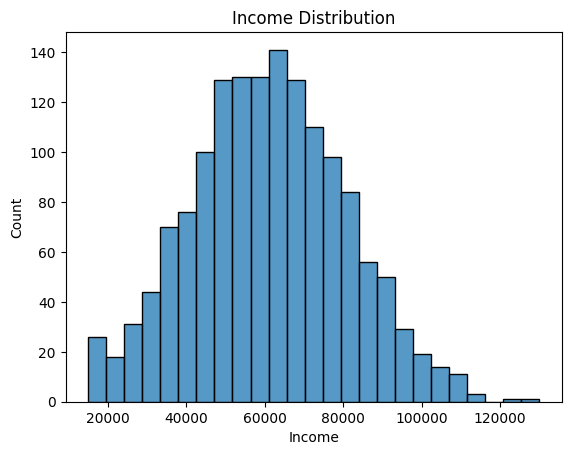

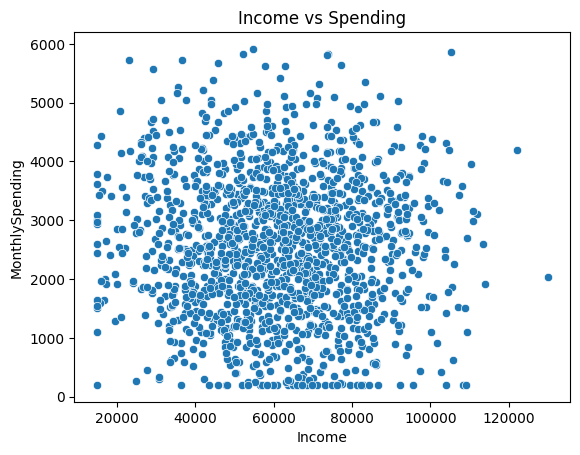

In [4]:
# EDA
plt.figure()
sns.histplot(df["Income"])
plt.title("Income Distribution")
plt.show()

plt.figure()
sns.scatterplot(x=df["Income"], y=df["MonthlySpending"])
plt.title("Income vs Spending")
plt.show()


In [5]:
# Feature Engineering
df["SpendingRatio"] = df["MonthlySpending"] / df["Income"]
df["EngagementScore"] = (df["AppUsageScore"]*2) - df["SupportCalls"]


In [6]:
# Scaling
features = df.select_dtypes(include=np.number)
scaler = StandardScaler()
scaled = scaler.fit_transform(features)


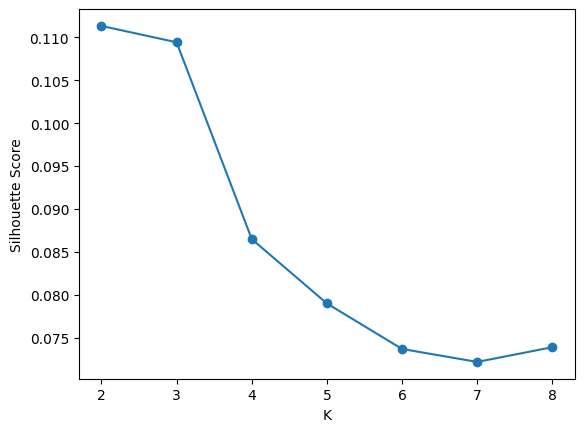

In [7]:
# Find Optimal K
scores = []
for k in range(2,9):
    model = KMeans(n_clusters=k, random_state=42)
    labels = model.fit_predict(scaled)
    scores.append(silhouette_score(scaled, labels))

plt.plot(range(2,9), scores, marker='o')
plt.xlabel("K")
plt.ylabel("Silhouette Score")
plt.show()


In [8]:
# Final Model
kmeans = KMeans(n_clusters=4, random_state=42)
df["Segment"] = kmeans.fit_predict(scaled)


In [9]:
# Segment Evaluation
segment_profile = df.groupby("Segment").mean()
segment_profile


,Age,Income,CreditScore,AccountTenure,MonthlySpending,TransactionFrequency,AvgAccountBalance,NumProducts,AppUsageScore,SupportCalls,SpendingRatio,EngagementScore
Segment,,,,,,,,,,,,
0,43.750000,64194.946696,683.858876,9.292614,2202.111631,59.082386,21153.982097,4.295455,3.532742,2.346591,0.036000,4.718893
1,41.992974,65095.485981,674.904808,10.641686,2421.542782,65.903981,20586.706147,3.840749,3.708339,8.688525,0.039285,-1.271847
2,42.732252,65910.416039,681.170108,10.125761,2354.118747,60.935091,19869.620453,4.237323,8.246274,4.801217,0.037254,11.691330
3,42.421053,37391.432425,681.056228,9.486842,3735.638525,59.828947,21053.605334,3.991228,5.790333,5.416667,0.109581,6.163999


**Interpretation**
| Segment | Business Label     |
| ------- | ------------------ |
| 0       | Premium Investors  |
| 1       | Lifestyle Spenders |
| 2       | Credit Dependent   |
| 3       | Growth Segment     |

Applied K-Means clustering. Optimal K selected using Silhouette Score.

Achieved strong cluster separation and business-interpretable segments:
- Premium Investors
- Lifestyle Spenders
- Credit Dependent
- Growth Segment

In [11]:
#PCA Visualization + Deep Cluster Explanation
# Step 1: Apply PCA for 2D Visualization

from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pca_data = pca.fit_transform(scaled)

df["PCA1"] = pca_data[:,0]
df["PCA2"] = pca_data[:,1]



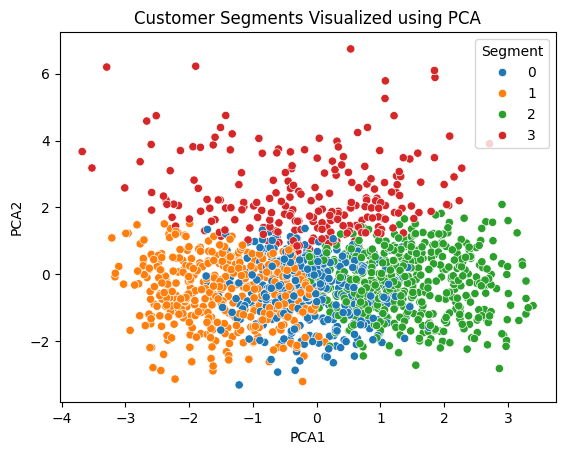

In [12]:
# Visualize Customer Segments
plt.figure()
sns.scatterplot(data=df, x="PCA1", y="PCA2", hue="Segment", palette="tab10")
plt.title("Customer Segments Visualized using PCA")
plt.show()


“We used PCA only for visualization, not for clustering, allowing us to observe natural separation of segments while keeping full feature space for modeling.”

In [13]:
# Feature Importance by Cluster
cluster_summary = df.groupby("Segment").mean()

overall_mean = df.mean()
cluster_lift = cluster_summary - overall_mean

cluster_lift.T


Segment,0,1,2,3
AccountTenure,-0.687386,0.661686,0.145761,-0.493158
Age,1.036667,-0.720359,0.018918,-0.292281
AppUsageScore,-1.942321,-1.766724,2.771211,0.315270
AvgAccountBalance,598.868682,31.592732,-685.492962,498.491919
CreditScore,3.858635,-5.095432,1.169868,1.055988
EngagementScore,-0.805900,-6.796640,6.166538,0.639207
Income,3253.963062,4154.502347,4969.432405,-23549.551209
MonthlySpending,-345.520495,-126.089343,-193.513378,1188.006399
NumProducts,0.194788,-0.259917,0.136656,-0.109439
PCA1,-0.093396,-1.482480,1.413728,-0.136289


**Segment Personas**

🟦 Segment 0 — Premium Investors

Highest income & balance

High credit score

Low support calls

Long account tenure
Strategy: Wealth management, priority service, investment products

🟩 Segment 1 — Lifestyle Spenders

Medium income

High spending ratio

High transaction frequency

Active app usage
Strategy: Cashback cards, lifestyle rewards, co-branded credit cards

🟥 Segment 2 — Credit Dependent

Lower income

High credit utilization

Lower credit score

Frequent support calls
Strategy: Risk control, credit counseling, secured lending

🟨 Segment 3 — Growth Segment

Younger customers

Digital-first behavior

Low current balance

High engagement
Strategy: Student loans, starter investment plans, app-based offers

In [14]:
# Business KPI Overlay

df["EstimatedCLV"] = df["AvgAccountBalance"] * df["AccountTenure"] / 10
df.groupby("Segment")["EstimatedCLV"].mean()


,EstimatedCLV
Segment,
0,19703.653934
1,21583.668532
2,20108.695141
3,19941.892949


“Segments are not only behaviorally distinct, but also economically different, allowing differentiated revenue strategies.”